In [1]:
%matplotlib inline

In [1]:
import os
import pandas as pd
import numpy as np
import DesignMetrics as dm
import SymDesignUtils as sdu

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
mean = 'mean'
std = 'std'
idx_slice = pd.IndexSlice

## escher

In [5]:
analysis_file1 = '/yeates1/kmeador/Nanohedra_T33/210714_3Fragment_SelectedDesigns/TrajectoryMetrics-Key.csv'
analysis_file2 = '/yeates1/kmeador/Nanohedra_T33/210714_3Fragment_Ratios_SelectedDesignsNoOverlap/TrajectoryMetrics-Key.csv'
analysis_file_redo = '/yeates1/kmeador/Nanohedra_T33/210824_Redo_of_210714_3Fragment_SelectedDesigns/TrajectoryMetrics.csv'
analysis_file_packing = '/yeates1/kmeador/Nanohedra_T33/210825_redo_210714_3Fragment_designs_poses_SelectedDesigns/TrajectoryMetrics.csv'

### penguin

In [ ]:
home_dir = '/home/kmeador14/analysis_intuition'

In [9]:
analysis_file1 = '/home/kmeador14/analysis_intuition/TrajectoryMetrics-Key.csv'
analysis_file2 = '/home/kmeador14/analysis_intuition/210714_3Fragment_Ratios_SelectedDesignsNoOverlap-TrajectoryMetrics.csv'
analysis_file_redo = '/home/kmeador14/analysis_intuition/210824_Redo_of_210714_3Fragment_SelectedDesigns-TrajectoryMetrics.csv'

## powerpanda

In [6]:
home_dir = '/home/kylemeador/designs/analysis_intuition'

In [7]:
analysis_file1 = os.path.join(home_dir, 'TrajectoryMetrics-Key.csv')
analysis_file2 = os.path.join(home_dir, '210714_3Fragment_Ratios_SelectedDesignsNoOverlap-TrajectoryMetrics.csv')
analysis_file_redo = os.path.join(home_dir, '210824_Redo_of_210714_3Fragment_SelectedDesigns-TrajectoryMetrics.csv')
analysis_file_packing = os.path.join(home_dir, '210825_redo_210714_3Fragment_designs_poses_SelectedDesigns-TrajectoryMetrics.csv')

In [56]:
df1 = pd.read_csv(analysis_file1, index_col=0, header=[0])
df2 = pd.read_csv(analysis_file2, index_col=0, header=[0])
df3 = pd.read_csv(analysis_file_redo, index_col=0, header=[0])
df4 = pd.read_csv(analysis_file_packing, index_col=0, header=[0])

In [57]:
km_selected_design_indices = ['1mr7_3m6n-DEGEN_1_1-ROT_31_9-tx_238_clean_asu_scout_hbnet_design_profile_0247_0001','1ode_3q98-DEGEN_1_1-ROT_27_27-tx_335_clean_asu_scout_hbnet_design_profile_0009_0001','1pd5_2zhy-DEGEN_1_1-ROT_22_1-tx_42_clean_asu_scout_hbnet_design_profile_0086_0001','1pd5_4g9q-DEGEN_1_2-ROT_16_16-tx_25_clean_asu_scout_hbnet_design_profile_0199_0001','1vfj_1ekq-DEGEN_1_2-ROT_40_7-tx_270_clean_asu_scout_hbnet_design_profile_0003_13_0001','1vhc_3qv0-DEGEN_1_1-ROT_33_7-tx_86_clean_asu_scout_structure_background_0005','1vhc_4knp-DEGEN_1_1-ROT_33_18-tx_91_clean_asu_scout_structure_background_0003','1x25_2gtr-DEGEN_1_2-ROT_17_40-tx_156_clean_asu_scout_hbnet_design_profile_0007_1_0001','1x25_4g9q-DEGEN_1_1-ROT_3_37-tx_150_clean_asu_scout_hbnet_design_profile_0005_0001','1zvb_4ogg-DEGEN_1_1-ROT_38_32-tx_82_clean_asu_scout_hbnet_design_profile_0019_0001','2gtr_1df4-DEGEN_1_1-ROT_27_38-tx_257_clean_asu_scout_structure_background_0002','2gtr_1j2v-DEGEN_1_2-ROT_40_25-tx_118_clean_asu_scout_hbnet_design_profile_0099_0001','2gtr_2gdg-DEGEN_1_2-ROT_3_26-tx_78_clean_asu_scout_hbnet_design_profile_0058_0001','2gtr_3cp1-DEGEN_1_1-ROT_2_32-tx_208_clean_asu_scout_hbnet_design_profile_0152_0001','2gtr_3m6n-DEGEN_1_1-ROT_23_13-tx_177_clean_asu_scout_hbnet_design_profile_0030_0001','2gtr_3m6n-DEGEN_1_2-ROT_15_25-tx_349_clean_asu_scout_hbnet_design_profile_0013_0001','2gtr_3mjz-DEGEN_1_2-ROT_2_15-tx_264_clean_asu_scout_hbnet_design_profile_0033_0001','2gtr_3qv0-DEGEN_1_1-ROT_10_21-tx_353_clean_asu_scout_structure_background_0004','2pd2_4k2n-DEGEN_1_1-ROT_40_8-tx_133_clean_asu_scout_structure_background_0004','2pd2_4n72-DEGEN_1_1-ROT_3_7-tx_42_clean_asu_scout_hbnet_design_profile_0063_0001','2pd2_4wcz-DEGEN_1_1-ROT_39_9-tx_130_clean_asu_scout_hbnet_design_profile_0137_0001','2pd2_4wcz-DEGEN_1_1-ROT_39_9-tx_181_clean_asu_scout_structure_background_0002','2pd2_4wcz-DEGEN_1_1-ROT_4_8-tx_29_clean_asu_scout_structure_background_0001','2pd2_4wcz-DEGEN_1_1-ROT_9_1-tx_18_clean_asu_scout_hbnet_design_profile_0040_0001','2vky_4myl-DEGEN_1_1-ROT_7_36-tx_148_clean_asu_scout_hbnet_design_profile_0111_0001','3fwt_2gtr-DEGEN_1_1-ROT_15_20-tx_237_clean_asu_scout_structure_background_0001','3fwt_4knp-DEGEN_1_1-ROT_16_26-tx_66_clean_asu_scout_hbnet_design_profile_0167_0001','3fwt_4wcz-DEGEN_1_2-ROT_15_17-tx_66_clean_asu_scout','3hrx_1df4-DEGEN_1_1-ROT_5_20-tx_196_clean_asu_scout_hbnet_design_profile_0016_0001','3hrx_3fwt-DEGEN_1_1-ROT_24_29-tx_44_clean_asu_scout_hbnet_design_profile_0020_0001','3hrx_4mi2-DEGEN_1_1-ROT_24_6-tx_76_clean_asu_scout_hbnet_design_profile_0119_0001','3hrx_4o8u-DEGEN_1_1-ROT_36_25-tx_223_clean_asu_scout_structure_background_0004','3jv1_3qv0-DEGEN_1_2-ROT_6_18-tx_383_clean_asu_scout_hbnet_design_profile_0157_0001','3jv1_4gvr-DEGEN_1_2-ROT_5_33-tx_207_clean_asu_scout_hbnet_design_profile_0021_0001','3l3s_1vhc-DEGEN_1_1-ROT_37_14-tx_163_clean_asu_scout_hbnet_design_profile_0113_0001','3l3s_3m6n-DEGEN_1_1-ROT_2_10-tx_40_clean_asu_scout_hbnet_design_profile_0003_0001','3pac_3mjz-DEGEN_1_1-ROT_36_10-tx_52_clean_asu_scout_hbnet_design_profile_0043_0001','3pac_4jcu-DEGEN_1_1-ROT_39_11-tx_89_clean_asu_scout_hbnet_design_profile_0249_0001','3q98_2gtr-DEGEN_1_1-ROT_1_5-tx_334_clean_asu_scout_hbnet_design_profile_0160_0001','3q98_4o8u-DEGEN_1_1-ROT_6_11-tx_417_clean_asu_scout_hbnet_design_profile_0005_0001','3tf3_1ihc-DEGEN_1_1-ROT_25_38-tx_230_clean_asu_scout_hbnet_design_profile_0018_1_0001','3tf3_2gtr-DEGEN_1_1-ROT_13_33-tx_82_clean_asu_scout_hbnet_design_profile_0084_0001','3tf3_4n72-DEGEN_1_2-ROT_17_15-tx_203_clean_asu_scout_structure_background_0005','3tf3_4wcz-DEGEN_1_2-ROT_13_34-tx_302_clean_asu_scout_hbnet_design_profile_0001_0001','3wfv_2gtr-DEGEN_1_2-ROT_5_19-tx_559_clean_asu_scout_hbnet_design_profile_0188_0001','4f47_3m6n-DEGEN_1_1-ROT_3_13-tx_380_clean_asu_scout_hbnet_design_profile_0039_0001','4f47_3r0p-DEGEN_1_2-ROT_24_28-tx_53_clean_asu_scout_structure_background_0001','4f47_3zmf-DEGEN_1_2-ROT_8_17-tx_396_clean_asu_scout_hbnet_design_profile_0008_0001','4jcu_1ekq-DEGEN_1_1-ROT_15_10-tx_178_clean_asu_scout_hbnet_design_profile_0024_0001','4jcu_3m6n-DEGEN_1_1-ROT_12_6-tx_283_clean_asu_scout_structure_background_0004','4jcu_3qv0-DEGEN_1_2-ROT_23_12-tx_144_clean_asu_scout_hbnet_design_profile_0048_0001','4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_scout_hbnet_design_profile_0192_0001','4jcu_4myl-DEGEN_1_2-ROT_25_14-tx_2_clean_asu_scout_hbnet_design_profile_0113_0001','4jcu_4wcz-DEGEN_1_2-ROT_10_34-tx_249_clean_asu_scout_structure_background_0002','4k2n_3m6n-DEGEN_1_2-ROT_6_33-tx_324_clean_asu_scout_hbnet_design_profile_0040_0001','4k2n_4mi2-DEGEN_1_2-ROT_3_11-tx_479_clean_asu_scout_structure_background_0002','4k3w_2zhy-DEGEN_1_1-ROT_1_39-tx_109_clean_asu_scout_hbnet_design_profile_0048_0001','4k3w_4mi2-DEGEN_1_1-ROT_11_7-tx_172_clean_asu_scout_structure_background_0003','4kd6_1o5j-DEGEN_1_2-ROT_3_1-tx_107_clean_asu_scout_hbnet_design_profile_0178_0001','4kd6_4m1a-DEGEN_1_1-ROT_2_16-tx_79_clean_asu_scout_hbnet_design_profile_0057_0001','4lk5_1j2v-DEGEN_1_1-ROT_11_25-tx_175_clean_asu_scout','4lk5_3mf7-DEGEN_1_2-ROT_20_33-tx_49_clean_asu_scout_hbnet_design_profile_0197_0001','4mi2_1osc-DEGEN_1_1-ROT_15_33-tx_42_clean_asu_scout_structure_background_0002','4mi2_2gtr-DEGEN_1_1-ROT_25_1-tx_91_clean_asu_scout_structure_background_0003','4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_scout_structure_background_0002','4mi2_4g9q-DEGEN_1_1-ROT_20_39-tx_586_clean_asu_scout_hbnet_design_profile_0078_0001','4mi2_4g9q-DEGEN_1_1-ROT_8_6-tx_383_clean_asu_scout_hbnet_design_profile_0184_0001','4mi2_4o8u-DEGEN_1_1-ROT_17_20-tx_24_clean_asu_scout_structure_background_0005','4mi2_4wcz-DEGEN_1_1-ROT_24_36-tx_49_clean_asu_scout_hbnet_design_profile_0019_0001','4o8u_1lu9-DEGEN_1_1-ROT_27_27-tx_419_clean_asu_scout_hbnet_design_profile_0003_0001','4wcz_2ej5-DEGEN_1_1-ROT_20_21-tx_108_clean_asu_scout_hbnet_design_profile_0118_0001','4wcz_3cp1-DEGEN_1_2-ROT_27_31-tx_234_clean_asu_scout_hbnet_design_profile_0207_0001','4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_scout_hbnet_design_profile_0088_0001','4wcz_4n72-DEGEN_1_1-ROT_7_14-tx_107_clean_asu_scout_structure_background_0004','4wcz_4n72-DEGEN_1_2-ROT_5_40-tx_206_clean_asu_scout_hbnet_design_profile_0199_0001','1mr7_2ej5-DEGEN_1_1-ROT_32_20-tx_49_clean_asu_scout_hbnet_design_profile_0154_0001','1mr7_3m6n-DEGEN_1_1-ROT_35_38-tx_246_clean_asu_scout_hbnet_design_profile_0030_0001','1pd5_4knp-DEGEN_1_1-ROT_16_30-tx_232_clean_asu_scout_hbnet_design_profile_0001_13_0001','1v4n_4glf-DEGEN_1_1-ROT_21_3-tx_32_clean_asu_scout_hbnet_design_profile_0217_0001','1vhc_4g9q-DEGEN_1_1-ROT_24_34-tx_459_clean_asu_scout_hbnet_design_profile_0048_0001','1vhc_4knp-DEGEN_1_1-ROT_3_26-tx_309_clean_asu_scout_structure_background_0004','1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_clean_asu_scout_hbnet_design_profile_0180_0001','2gtr_1nq3-DEGEN_1_2-ROT_1_18-tx_132_clean_asu_scout_hbnet_design_profile_0248_0001','3jv1_1j2v-DEGEN_1_1-ROT_2_3-tx_65_clean_asu_scout_hbnet_design_profile_0082_0001','3pac_1zoi-DEGEN_1_1-ROT_25_6-tx_205_clean_asu_scout_structure_background_0005','4mi2_3m6n-DEGEN_1_1-ROT_21_15-tx_78_clean_asu_scout_structure_background_0002','4wcz_2ej5-DEGEN_1_1-ROT_17_25-tx_129_clean_asu_scout_structure_background_0005']

In [8]:
sorted_quality_scores = [1,1,-1,-1,1,-1,1,0,0,1,0,1,-1,1,0,-1,1,-1,-1,0,-1,1,0,-1,0,-1,1,0,1,1,1,0,1,-1,1,-1,0,1,0,-1,1,1,1,1,0,1,-1,1,0,-1,1,1,-1,-1,-1,0,1,1,1,1,1,1,1,1,1,-1,1,1,0,-1,1,1,1,1,0,0,-1,1,1,1,-1,0,-1,1,0,1,0,1,0,0,0,1,1,1,0,-1,0,0,0,1,1,0,-1,1,1,1,-1,0,0,1,1,-1,-1,-1,1,-1,-1,0,-1,-1,-1,0,0,0,0,0,-1,0,-1,-1,0,0,1,0,1,-1,-1,1,1,1,0,0,1,1,1,1,0,0,-1,-1,0,-1,-1,-1,-1,0,0,-1,0,0,-1,0,0,0,0,0,1,1,1,0,1,-1,1,1,0,1,-1,1,1,0,0,1,-1,0,0,1,1,0,0,0,-1,1,0,-1,0,0,1,0,1,1,1,0,0,-1,1,1,1,0,1,1,0,1,-1,-1,0,0,0,0,0,0,-1,0,1,0,0,1,0,1,1,0,1,1,0]

In [54]:
sorted_quality_scores[212:214]

[-1, -1]

In [55]:
# 150 = 1 (122 design number)
# 151 = 0 (123 design number)
# 158 = 0 (131 design number)
# 194 = 0 (163 design number)
# 213 = 0 (181 design number)
sorted_quality_scores[149] = 1
sorted_quality_scores[150] = 0
sorted_quality_scores[157] = 0
sorted_quality_scores[193] = 0
sorted_quality_scores[212] = 0

In [58]:
# df1 = df1.rename(columns={'interface_buried_hbonds': 'buried_unsatisfied_hbonds'})
df1.rename(columns={'interface_buried_hbonds': 'buried_unsatisfied_hbonds'}, inplace=True)

In [59]:
df2.sort_index(inplace=True)

In [60]:
df2['design_number'] = list(range(201, len(df2) + 201))

In [61]:
df = pd.concat([df1, df2])

In [62]:
df['buried_unsatisfied_hbond_density'] = df['buried_unsatisfied_hbonds'] / df['interface_area_total']

In [63]:
df.describe()

,design_number,selection_weight,contact_count,contact_order_collapse_z_sum,core,energy_distance_from_no_constraint_mean,entity_1_c_terminal_helix,entity_1_c_terminal_orientation,entity_1_max_radius,entity_1_n_terminal_helix,entity_1_n_terminal_orientation,entity_1_number_of_residues,entity_2_c_terminal_helix,entity_2_c_terminal_orientation,entity_2_max_radius,entity_2_n_terminal_helix,entity_2_n_terminal_orientation,entity_2_number_of_residues,favor_residue_energy,global_collapse_z_sum,hydrophobicity_deviation_magnitude,interaction_energy_complex,interaction_energy_per_residue,interface_area_hydrophobic,interface_area_polar,interface_area_total,interface_bound_activation_energy,buried_unsatisfied_hbonds,interface_composition_similarity,interface_connectivity,interface_connectivity_1,interface_connectivity_2,interface_energy,interface_energy_bound,interface_energy_complex,interface_energy_density,interface_energy_unbound,interface_secondary_structure_count,interface_secondary_structure_fragment_count,interface_separation,multiple_fragment_ratio,nanohedra_score,nanohedra_score_center,nanohedra_score_center_normalized,nanohedra_score_normalized,new_collapse_island_significance,new_collapse_islands,number_fragment_residues_center,number_fragment_residues_total,number_hbonds,number_of_fragments,number_of_mutations,observed_design,observed_evolution,observed_fragment,percent_core,percent_fragment,percent_fragment_coil,percent_fragment_helix,percent_fragment_strand,percent_interface_area_hydrophobic,percent_interface_area_polar,percent_residues_fragment_center,percent_residues_fragment_total,percent_rim,percent_support,rim,rmsd_complex,rosetta_reference_energy,sequential_collapse_peaks_z_sum,sequential_collapse_z_sum,shape_complementarity,solvation_energy,solvation_energy_bound,solvation_energy_complex,solvation_energy_unbound,support,total_interface_residues,total_non_fragment_interface_residues,buried_unsatisfied_hbond_density,design_dimension,entity_1_min_radius,entity_1_radius,entity_2_min_radius,entity_2_radius,entity_max_radius_average_deviation,entity_max_radius_ratio_1v2,entity_maximum_radius,entity_min_radius_average_deviation,entity_min_radius_ratio_1v2,entity_minimum_radius,entity_number_of_residues_average_deviation,entity_number_of_residues_ratio_1v2,entity_radius_average_deviation,entity_radius_ratio_1v2,entity_residue_length_total,interface_b_factor_per_residue,observations
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.0,233.000000,210.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,33.0,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.0,33.000000
mean,117.000000,0.660384,3.542970,66.575009,13.433476,12.369634,0.394850,0.278970,71.816768,0.184549,0.665236,195.896996,0.476395,0.493562,75.257774,0.240343,0.553648,214.639485,0.0,54.485980,72.667737,-43.897789,-0.956349,756.389928,494.621824,1251.011752,76.905898,2.103004,0.690420,31.635792,15.721067,15.914725,19.666255,-289.926713,-347.166357,0.016086,-366.832611,14.639485,3.806867,0.524770,2.975472,27.918388,6.114755,0.567547,0.860933,3.655283,3.742489,10.858369,32.922747,26.081545,16.253219,34.793991,0.980614,0.9

In [64]:
df = pd.concat([df], keys=['pose'], axis=1)

In [65]:
df[('pose', 'design_number')]

1gu9_3qv0-DEGEN_1_1-ROT_6_7-tx_14_clean_asu_scout_hbnet_design_profile_0020_0001         1
1gu9_3qv0-DEGEN_1_2-ROT_4_31-tx_28_clean_asu_scout_hbnet_design_profile_0005_0001        2
1hfo_3hrx-DEGEN_1_1-ROT_5_22-tx_305_clean_asu_scout_hbnet_design_profile_0220_0001       3
1hfo_4k2n-DEGEN_1_1-ROT_1_10-tx_129_clean_asu_scout_structure_background_0005            4
1mr7_3m6n-DEGEN_1_1-ROT_25_14-tx_80_clean_asu_scout_structure_background_0005            5
                                                                                      ... 
4k2n_3fwu-DEGEN_1_2-ROT_37_38-tx_106_clean_asu_scout_hbnet_design_profile_0115_0001    229
4kd6_1j2v-DEGEN_1_1-ROT_2_7-tx_146_clean_asu_scout                                     230
4kd6_4wcz-DEGEN_1_2-ROT_1_27-tx_293_clean_asu_scout_hbnet_design_profile_0165_0001     231
4mi2_3m6n-DEGEN_1_1-ROT_21_15-tx_78_clean_asu_scout_structure_background_0002          232
4wcz_2ej5-DEGEN_1_1-ROT_17_25-tx_129_clean_asu_scout_structure_background_0005         233

In [66]:
df[('pose', 'interface_quality_score')] = sorted_quality_scores

In [67]:
redone_df = df3.loc[set(df.index).difference(['4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_scout_structure_background_0002']), :]
redone_df2 = df4.loc[set(df.index).difference(['4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_scout_structure_background_0002']), :]

In [68]:
missing_data_df = pd.DataFrame({'4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_scout_structure_background_0002': {'selection_weight': 0, 'contact_count':0}}).T
redone_df = redone_df.append(missing_data_df)
redone_df2 = redone_df2.append(missing_data_df)

In [69]:
redone_df.sort_index(inplace=True)
redone_df2.sort_index(inplace=True)

In [70]:
redone_df2

,selection_weight,buried_unsatisfied_hbond_density,buried_unsatisfied_hbonds,contact_count,contact_order_collapse_z_sum,core,design_dimension,energy_distance_from_no_constraint_mean,entity_1_c_terminal_helix,entity_1_c_terminal_orientation,entity_1_max_radius,entity_1_min_radius,entity_1_n_terminal_helix,entity_1_n_terminal_orientation,entity_1_name,entity_1_number_of_residues,entity_1_radius,entity_1_symmetry,entity_2_c_terminal_helix,entity_2_c_terminal_orientation,entity_2_max_radius,entity_2_min_radius,entity_2_n_terminal_helix,entity_2_n_terminal_orientation,entity_2_name,entity_2_number_of_residues,entity_2_radius,entity_2_symmetry,entity_max_radius_average_deviation,entity_max_radius_ratio_1v2,entity_maximum_radius,entity_min_radius_average_deviation,entity_min_radius_ratio_1v2,entity_minimum_radius,entity_number_of_residues_average_deviation,entity_number_of_residues_ratio_1v2,entity_radius_average_deviation,entity_radius_ratio_1v2,entity_residue_length_total,errat_accuracy,errat_deviation,favor_residue_energy,global_collapse_z_sum,hydrophobicity_deviation_magnitude,interaction_energy_complex,interaction_energy_per_residue,interface_area_hydrophobic,interface_area_polar,interface_area_to_residue_surface_ratio,interface_area_total,interface_b_factor_per_residue,interface_bound_activation_energy,interface_composition_similarity,interface_connectivity,interface_connectivity_1,interface_connectivity_2,interface_energy,interface_energy_bound,interface_energy_complex,interface_energy_density,interface_energy_unbound,interface_local_density,interface_secondary_structure_count,interface_secondary_structure_fragment_count,interface_secondary_structure_fragment_topology,interface_secondary_structure_fragment_topology_1,interface_secondary_structure_fragment_topology_2,interface_secondary_structure_topology,interface_secondary_structure_topology_1,interface_secondary_structure_topology_2,interface_separation,multiple_fragment_ratio,nanohedra_score,nanohedra_score_center,nanohedra_score_center_normalized,nanohedra_score_normalized,new_collapse_island_significance,new_collapse_islands,number_fragment_residues_center,number_fragment_residues_total,number_hbonds,number_of_fragments,number_of_mutations,observations,observed_design,observed_evolution,observed_fragment,percent_core,percent_fragment,percent_fragment_coil,percent_fragment_helix,percent_fragment_strand,percent_interface_area_hydrophobic,percent_interface_area_polar,percent_residues_fragment_center,percent_residues_fragment_total,percent_rim,percent_support,protocol,rim,rmsd_complex,rosetta_reference_energy,sequential_collapse_peaks_z_sum,sequential_collapse_z_sum,shape_complementarity,solvation_energy,solvation_energy_bound,solvation_energy_complex,solvation_energy_unbound,support,symmetry_group_1,symmetry_group_2,total_interface_residues,total_non_fragment_interface_residues,initial_shape_complementarity
1gu9_3qv0-DEGEN_1_1-ROT_6_7-tx_14_clean_asu_scout_hbnet_design_profile_0020_0001,0.597844,0.001445,2.0,4.100000,29.479843,14.0,0.0,14.358905,1.0,-1.0,76.475431,36.593749,1.0,-1.0,1gu9_1,167.0,56.559172,C3,1.0,1.0,65.102084,25.030435,1.0,1.0,3qv0_1,179.0,48.487922,C3,0.174700,1.174700,76.475431,0.461970,1.461970,25.030435,0.067039,0.932961,0.166459,1.166459,346.0,96.8750,0.0,0.0,57.610083,78.735023,-35.125631,-0.731784,801.500067,582.609133,0.431597,1384.109200,0.0,27.215525,0.768978,32.347592,17.474577,14.873015,-19.478434,-270.077384,-316.771343,-0.014073,-297.292909,31.227199,15.0,4.0,HHHH,HH,HH,HTHCHCHCHCHCHET,HTHCHCHC,HCHCHET,0.454784,3.000000,20.813905,4.091172,0.681862,0.867246,1.531756,4.0,6.0,24.0,29.0,9.0,35.0,84.0,0.992,0.985,0.947,0.297872,0.252632,0.000000,1.000000,0.000000,0.579073,0.420927,0.063158,0.252632,0.297872,0.404255,hbnet_design_profile,14.0,0.434026,106.12298,85.621549,46.846982,0.708068,-37.851916,446.275869,485.244890,447.392973,19.0,C3,C3,95.0,89.0,NaN
1gu9_3qv0-DEGEN_1_2-ROT_4_31-tx_28_clean_asu_scout_hbnet_design_profile_0005_0001,0.512307,0.0

In [71]:
redone_df['interface_quality_score'] = sorted_quality_scores
redone_df2['interface_quality_score'] = sorted_quality_scores

In [72]:
redone_df = pd.concat([redone_df], keys=['pose'], axis=1)
redone_df2 = pd.concat([redone_df2], keys=['pose'], axis=1)

In [73]:
redone_df2.drop('4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_scout_structure_background_0002', axis=0, inplace=True)

In [74]:
redone_df2

pose  \
                                                   selection_weight   
1gu9_3qv0-DEGEN_1_1-ROT_6_7-tx_14_clean_asu_sco...         0.597844   
1gu9_3qv0-DEGEN_1_2-ROT_4_31-tx_28_clean_asu_sc...         0.512307   
1hfo_3hrx-DEGEN_1_1-ROT_5_22-tx_305_clean_asu_s...         0.715272   
1hfo_4k2n-DEGEN_1_1-ROT_1_10-tx_129_clean_asu_s...         0.767526   
1mr7_2ej5-DEGEN_1_1-ROT_32_20-tx_49_clean_asu_s...         0.748035   
...                                                             ...   
4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_...         0.764183   
4wcz_4mod-DEGEN_1_1-ROT_19_33-tx_76_clean_asu_s...         0.671719   
4wcz_4n72-DEGEN_1_1-ROT_7_14-tx_107_clean_asu_s...         0.723568   
4wcz_4n72-DEGEN_1_2-ROT_5_40-tx_206_clean_asu_s...         0.695692   
4xcw_4kd6-DEGEN_1_1-ROT_2_23-tx_34_clean_asu_sc...         0.690694   

                                                                                     \
                                                   buried_unsatisfied_hbond_density   
1gu9_3qv0-DEGEN_1_1-ROT_6_7-tx_14_clean_asu_sco...                         0.001445   
1gu9_3qv0-DEGEN_1_2-ROT_4_31-tx_28_clean_asu_sc...                         0.001944   
1hfo_3hrx-DEGEN_1_1-ROT_5_22-tx_305_clean_asu_s...                         0.001968   
1hfo_4k2n-DEGEN_1_1-ROT_1_10-tx_129_clean_asu_s...                         0.002111   
1mr7_2ej5-DEGEN_1_1-ROT_32_20-tx_49_clean_asu_s...                         0.001980   
...                                                                             ...   
4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_...                         0.001650   
4wcz_4mod-DEGEN_1_1-ROT_19_33-tx_76_clean_asu_s...                         0.001947   
4wcz_4n72-DEGEN_1_1-ROT_7_14-tx_107_clean_asu_s...                         0.002416   
4wcz_4n72-DEGEN_1_2-ROT_5_40-tx_206_clean_asu_s...                         0.000850   
4xcw_4kd6-DEGEN_1_1-ROT_2_23-tx_34_clean_asu_sc...                         0.001297   

                                                                              \
                                                   buried_unsatisfied_hbonds   
1gu9_3qv0-DEGEN_1_1-ROT_6_7-tx_14_clean_asu_sco...                       2.0   
1gu9_3qv0-DEGEN_1_2-ROT_4_31-tx_28_clean_asu_sc...                       2.0   
1hfo_3hrx-DEGEN_1_1-ROT_5_22-tx_305_clean_asu_s...                       2.0   
1hfo_4k2n-DEGEN_1_1-ROT_1_10-tx_129_clean_asu_s...                       3.0   
1mr7_2ej5-DEGEN_1_1-ROT_32_20-tx_49_clean_asu_s...                       2.0   
...                                                                      ...   
4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_...                       2.0   
4wcz_4mod-DEGEN_1_1-ROT_19_33-tx_76_clean_asu_s...                       2.0   
4wcz_4n72-DEGEN_1_1-ROT_7_14-tx_107_clean_asu_s...                       3.0   
4wcz_4n72-DEGEN_1_2-ROT_5_40-tx_206_clean_asu_s...                       1.0   
4xcw_4kd6-DEGEN_1_1-ROT_2_23-tx_34_clean_asu_sc...                       2.0   

                                                                  \
                                                   contact_count   
1gu9_3qv0-DEGEN_1_1-ROT_6_7-tx_14_clean_asu_sco...      4.100000   
1gu9_3qv0-DEGEN_1_2-ROT_4_31-tx_28_clean_asu_sc...      3.591440   
1hfo_3hrx-DEGEN_1_1-ROT_5_22-tx_305_clean_asu_s...      3.520349   
1hfo_4k2n-DEGEN_1_1-ROT_1_10-tx_129_clean_asu_s...      3.875306   
1mr7_2ej5-DEGEN_1_1-ROT_32_20-tx_49_clean_asu_s...      4.602447   
...                                                          ...   
4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_...      3.706004   
4wcz_4mod-DEGEN_1_1-ROT_19_33-tx_76_clean_asu_s...      4.407258   
4wcz_4n72-DEGEN_1_1-ROT_7_14-tx_107_clean_asu_s...      3.303109   
4wcz_4n72-DEGEN_1_2-ROT_5_40-tx_206_clean_asu_s...      3.411348   
4xcw_4kd6-DEGEN_1_1-ROT_2_23-tx_34_clean_asu_sc...      3.365000   

                                                                                 

In [75]:
weight_df = redone_df2

In [29]:
selected_df = dm.prioritize_design_indices(weight_df, filter=False, weight=True)


-------------------- Select design weight Metrics --------------------

The provided dataframe will be used to select designs based on the measured metrics from each pose. To 'weight' designs, which metrics would you like to utilize?
To see a describtion of the data, enter 'describe'

The available metrics are located in the top row(s) of your DataFrame. Enter your selected metrics as a comma separated input or alternatively, you can check out the available metrics by entering 'metrics'.
Ex: 'shape_complementarity, contact_count, etc.'



Input:  interface_composition_similarity,interface_connectivity,interface_energy_density,shape_complementarity



For each metric, choose a percentage signifying the metric's contribution to the total selection weight. The weight will be used as a linear combination of all weights according to each designs rank within the specified metric category. For instance, typically the total weight should equal 1. When choosing 5 metrics, you can assign an equal weight to each (specify 0.2 for each) or you can weight several more strongly (0.3, 0.3, 0.2, 0.1, 0.1). When ranking occurs, for each selected metric the metric will be sorted and designs in the top percentile will be given their percentage of the full weight. Top percentile is defined as the most advantageous score, so the top percentile of energy is lowest, while for hydrogen bonds it would be the most.

To see a describtion of the data, enter 'describe'



For 'interface_composition_similarity' what value should be used for design weighting?
Input:  0.2
For 'interface_energy_density' what value should be used for design weighting?
Input:  0.4
For 'shape_complementarity' what value should be used for design weighting?
Input:  0.3
For 'interface_connectivity' what value should be used for design weighting?
Input:  0.1


You selected:
	interface_composition_similarity 0.2
	interface_energy_density         0.4
	shape_complementarity            0.3
	interface_connectivity           0.1


If this is correct, indicate 'y', if not 'n', and you can re-input.
Input:  y


In [30]:
# selected_df[('interface_connectivity-shape_complementarity-interface_energy_density-interface_composition_similarity', 'sum', 'selection_weight')]
# selected_df[('interface_composition_similarity-shape_complementarity-interface_energy_density-interface_connectivity', 'sum', 'selection_weight')]
# selected_df[('interface_composition_similarity-interface_connectivity-shape_complementarity-interface_energy_density', 'sum', 'selection_weight')]
selected_df[('interface_composition_similarity-interface_energy_density-shape_complementarity-interface_connectivity', 'sum', 'selection_weight')]

3l3s_3q98-DEGEN_1_1-ROT_9_4-tx_239_clean_asu_scout_hbnet_design_profile_0001_3_0001      0.855172
1vhc_4g9q-DEGEN_1_1-ROT_24_34-tx_459_clean_asu_scout_hbnet_design_profile_0048_0001      0.823276
4f47_1zvb-DEGEN_1_1-ROT_10_18-tx_152_clean_asu_scout_hbnet_design_profile_0073_0001      0.815086
3q98_3fwt-DEGEN_1_2-ROT_29_4-tx_24_clean_asu_scout_structure_background_0004             0.791379
4lk5_1o5j-DEGEN_1_2-ROT_15_23-tx_107_clean_asu_scout_structure_background_0005           0.779741
                                                                                           ...   
4nkj_4knp-DEGEN_1_1-ROT_6_11-tx_396_clean_asu_scout_hbnet_design_profile_0086_0001       0.222414
2gtr_3cp1-DEGEN_1_2-ROT_4_20-tx_332_clean_asu_scout_structure_background_0001            0.184483
2pd2_4k2n-DEGEN_1_1-ROT_40_8-tx_133_clean_asu_scout_structure_background_0004            0.172845
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_scout_hbnet_design_profile_0007_1_0001    0.136638
4mi2_2gtr-DEGEN_1_1-

In [27]:
fig, ax = plt.subplots(1,1)

In [33]:
# ax.scatter(selected_df[('pose','pose','interface_quality_score')], selected_df[('interface_composition_similarity-interface_connectivity-shape_complementarity-interface_energy_density', 'sum', 'selection_weight')])
ax.scatter(selected_df[('pose','pose','interface_quality_score')], selected_df[('interface_composition_similarity-interface_energy_density-shape_complementarity-interface_connectivity', 'sum', 'selection_weight')])

In [48]:
selected_df.drop(('pose','pose','selection_weight'), axis=1, inplace=True)

In [34]:
selected_df.droplevel(0, axis=1).droplevel(0, axis=1).loc[:, ['selection_weight', 'interface_quality_score']].corr()

,selection_weight,selection_weight,interface_quality_score
selection_weight,1.000000,0.560729,0.030146
selection_weight,0.560729,1.000000,0.214314
interface_quality_score,0.030146,0.214314,1.000000


In [35]:
# plt.gca()
plt.show()

In [31]:
# atomic_selected_df = dm.prioritize_design_indices(df, filter=False, weight=True)
atomic_selected_df = dm.prioritize_design_indices(weight_df, filter=False, weight=True)


-------------------- Select design weight Metrics --------------------

The provided dataframe will be used to select designs based on the measured metrics from each pose. To 'weight' designs, which metrics would you like to utilize?
To see a describtion of the data, enter 'describe'

The available metrics are located in the top row(s) of your DataFrame. Enter your selected metrics as a comma separated input or alternatively, you can check out the available metrics by entering 'metrics'.
Ex: 'shape_complementarity, contact_count, etc.'



Input:  shape_complementarity,interface_energy_density



For each metric, choose a percentage signifying the metric's contribution to the total selection weight. The weight will be used as a linear combination of all weights according to each designs rank within the specified metric category. For instance, typically the total weight should equal 1. When choosing 5 metrics, you can assign an equal weight to each (specify 0.2 for each) or you can weight several more strongly (0.3, 0.3, 0.2, 0.1, 0.1). When ranking occurs, for each selected metric the metric will be sorted and designs in the top percentile will be given their percentage of the full weight. Top percentile is defined as the most advantageous score, so the top percentile of energy is lowest, while for hydrogen bonds it would be the most.

To see a describtion of the data, enter 'describe'



For 'shape_complementarity' what value should be used for design weighting?
Input:  0.3
For 'interface_energy_density' what value should be used for design weighting?
Input:  0.4


You selected:
	shape_complementarity    0.3
	interface_energy_density 0.4


If this is correct, indicate 'y', if not 'n', and you can re-input.
Input:  y


In [32]:
atomic_selected_df[('shape_complementarity-interface_energy_density', 'sum', 'selection_weight')] /= 0.7

In [33]:
atomic_selected_df[('shape_complementarity-interface_energy_density', 'sum', 'selection_weight')]

3jv1_3qv0-DEGEN_1_2-ROT_16_38-tx_246_clean_asu_scout_hbnet_design_profile_0108_0001      0.955665
2pd2_4wcz-DEGEN_1_1-ROT_4_8-tx_29_clean_asu_scout_structure_background_0001              0.949507
3l7q_2ej5-DEGEN_1_2-ROT_36_24-tx_134_clean_asu_scout_hbnet_design_profile_0019_0001      0.939655
4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_scout_hbnet_design_profile_0192_0001      0.939655
4f47_1zvb-DEGEN_1_1-ROT_10_18-tx_152_clean_asu_scout_hbnet_design_profile_0073_0001      0.931650
                                                                                           ...   
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_scout                                     0.102833
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_scout_hbnet_design_profile_0007_1_0001    0.100985
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_scout_hbnet_design_profile_0003_1_0001    0.087438
2gtr_3cp1-DEGEN_1_2-ROT_4_20-tx_332_clean_asu_scout_structure_background_0001            0.083744
4mi2_2gtr-DEGEN_1_1-

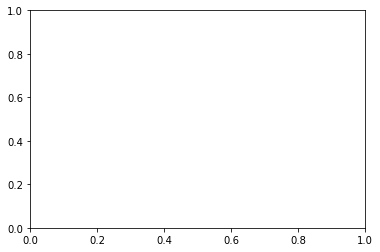

In [55]:
fig1, ax1 = plt.subplots(1,1)

In [56]:
ax1.scatter(atomic_selected_df[('pose','pose','interface_quality_score')], atomic_selected_df[('shape_complementarity-interface_energy_density', 'sum', 'selection_weight')])

In [ ]:
atomic_selected_df.drop(('pose','pose','selection_weight'), axis=1, inplace=True)

In [54]:
atomic_selected_df.droplevel(0, axis=1).droplevel(0, axis=1).loc[:, ['selection_weight', 'interface_quality_score']].corr()

,selection_weight,interface_quality_score
selection_weight,1.0000,0.0843
interface_quality_score,0.0843,1.0000


In [57]:
plt.show()

In [34]:
atomic_and_area_selected_df = dm.prioritize_design_indices(weight_df, filter=False, weight=True)


-------------------- Select design weight Metrics --------------------

The provided dataframe will be used to select designs based on the measured metrics from each pose. To 'weight' designs, which metrics would you like to utilize?
To see a describtion of the data, enter 'describe'

The available metrics are located in the top row(s) of your DataFrame. Enter your selected metrics as a comma separated input or alternatively, you can check out the available metrics by entering 'metrics'.
Ex: 'shape_complementarity, contact_count, etc.'



Input:  shape_complementarity,interface_energy



For each metric, choose a percentage signifying the metric's contribution to the total selection weight. The weight will be used as a linear combination of all weights according to each designs rank within the specified metric category. For instance, typically the total weight should equal 1. When choosing 5 metrics, you can assign an equal weight to each (specify 0.2 for each) or you can weight several more strongly (0.3, 0.3, 0.2, 0.1, 0.1). When ranking occurs, for each selected metric the metric will be sorted and designs in the top percentile will be given their percentage of the full weight. Top percentile is defined as the most advantageous score, so the top percentile of energy is lowest, while for hydrogen bonds it would be the most.

To see a describtion of the data, enter 'describe'



For 'interface_energy' what value should be used for design weighting?
Input:  0.4
For 'shape_complementarity' what value should be used for design weighting?
Input:  0.3


You selected:
	interface_energy      0.4
	shape_complementarity 0.3


If this is correct, indicate 'y', if not 'n', and you can re-input.
Input:  y


In [35]:
# atomic_and_area_selected_df[('shape_complementarity-interface_energy', 'sum', 'selection_weight')] /= 0.7
atomic_and_area_selected_df[('interface_energy-shape_complementarity', 'sum', 'selection_weight')] /= 0.7

In [36]:
# atomic_and_area_selected_df[('shape_complementarity-interface_energy', 'sum', 'selection_weight')]
atomic_and_area_selected_df[('interface_energy-shape_complementarity', 'sum', 'selection_weight')]

2pd2_4wcz-DEGEN_1_1-ROT_4_8-tx_29_clean_asu_scout_structure_background_0001              0.964286
4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_scout_hbnet_design_profile_0192_0001      0.947044
3l7q_2ej5-DEGEN_1_2-ROT_36_24-tx_134_clean_asu_scout_hbnet_design_profile_0019_0001      0.942118
4f47_1zvb-DEGEN_1_1-ROT_10_18-tx_152_clean_asu_scout_hbnet_design_profile_0073_0001      0.941502
3hrx_4mi2-DEGEN_1_1-ROT_24_3-tx_104_clean_asu_scout_hbnet_design_profile_0193_0001       0.940887
                                                                                           ...   
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_scout                                     0.102833
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_scout_hbnet_design_profile_0007_1_0001    0.088670
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_scout_hbnet_design_profile_0003_1_0001    0.087438
2gtr_3cp1-DEGEN_1_2-ROT_4_20-tx_332_clean_asu_scout_structure_background_0001            0.081281
4mi2_2gtr-DEGEN_1_1-

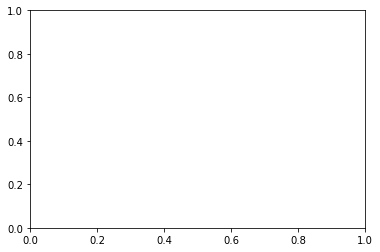

In [58]:
fig2, ax2 = plt.subplots(1,1)

In [60]:
# ax2.scatter(atomic_and_area_selected_df[('pose','pose','interface_quality_score')], atomic_and_area_selected_df[('shape_complementarity-interface_energy', 'sum', 'selection_weight')])
ax2.scatter(atomic_and_area_selected_df[('pose','pose','interface_quality_score')], atomic_and_area_selected_df[('interface_energy-shape_complementarity', 'sum', 'selection_weight')])

In [61]:
atomic_and_area_selected_df.drop(('pose','pose','selection_weight'), axis=1, inplace=True)

In [62]:
atomic_and_area_selected_df.droplevel(0, axis=1).droplevel(0, axis=1).loc[:, ['selection_weight', 'interface_quality_score']].corr()

,selection_weight,interface_quality_score
selection_weight,1.000000,0.137863
interface_quality_score,0.137863,1.000000


In [63]:
plt.show()

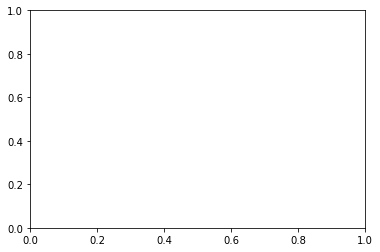

In [64]:
fig3, ax3 = plt.subplots(1,1)

In [66]:
# ax3.scatter(atomic_and_area_selected_df.loc[km_selected_design_indices, ('pose','pose','interface_quality_score')], atomic_and_area_selected_df.loc[km_selected_design_indices, ('shape_complementarity-interface_energy', 'sum', 'selection_weight')])
ax3.scatter(atomic_and_area_selected_df.loc[km_selected_design_indices, ('pose','pose','interface_quality_score')], atomic_and_area_selected_df.loc[km_selected_design_indices, ('interface_energy-shape_complementarity', 'sum', 'selection_weight')])

In [67]:
plt.show()

In [68]:
atomic_selected_df[('pose','pose','interface_quality_score')]

3jv1_3qv0-DEGEN_1_2-ROT_16_38-tx_246_clean_asu_scout_hbnet_design_profile_0108_0001      1
2pd2_4wcz-DEGEN_1_1-ROT_4_8-tx_29_clean_asu_scout_structure_background_0001              0
3l7q_2ej5-DEGEN_1_2-ROT_36_24-tx_134_clean_asu_scout_hbnet_design_profile_0019_0001      1
4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_scout_hbnet_design_profile_0192_0001      1
4f47_1zvb-DEGEN_1_1-ROT_10_18-tx_152_clean_asu_scout_hbnet_design_profile_0073_0001      0
                                                                                        ..
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_scout                                     1
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_scout_hbnet_design_profile_0007_1_0001   -1
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_scout_hbnet_design_profile_0003_1_0001    0
2gtr_3cp1-DEGEN_1_2-ROT_4_20-tx_332_clean_asu_scout_structure_background_0001            1
4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_scout_structure_background_0002            0

In [69]:
atomic_area_and_buns_selected_df = dm.prioritize_design_indices(weight_df, filter=False, weight=True)


-------------------- Select design weight Metrics --------------------

The provided dataframe will be used to select designs based on the measured metrics from each pose. To 'weight' designs, which metrics would you like to utilize?
To see a describtion of the data, enter 'describe'

The available metrics are located in the top row(s) of your DataFrame. Enter your selected metrics as a comma separated input or alternatively, you can check out the available metrics by entering 'metrics'.
Ex: 'shape_complementarity, contact_count, etc.'



Input:  shape_complementarity,interface_energy,buried_unsatisfied_hbond_density



For each metric, choose a percentage signifying the metric's contribution to the total selection weight. The weight will be used as a linear combination of all weights according to each designs rank within the specified metric category. For instance, typically the total weight should equal 1. When choosing 5 metrics, you can assign an equal weight to each (specify 0.2 for each) or you can weight several more strongly (0.3, 0.3, 0.2, 0.1, 0.1). When ranking occurs, for each selected metric the metric will be sorted and designs in the top percentile will be given their percentage of the full weight. Top percentile is defined as the most advantageous score, so the top percentile of energy is lowest, while for hydrogen bonds it would be the most.

To see a describtion of the data, enter 'describe'



For 'buried_unsatisfied_hbond_density' what value should be used for design weighting?
Input:  0.3
For 'interface_energy' what value should be used for design weighting?
Input:  0.4
For 'shape_complementarity' what value should be used for design weighting?
Input:  0.3


You selected:
	buried_unsatisfied_hbond_density 0.3
	interface_energy                 0.4
	shape_complementarity            0.3


If this is correct, indicate 'y', if not 'n', and you can re-input.
Input:  y


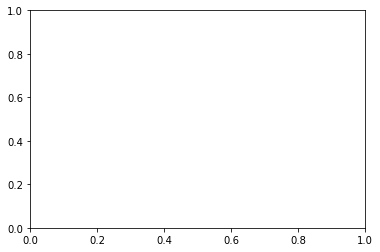

In [70]:
fig4, ax4 = plt.subplots(1,1)

In [72]:
# atomic_and_area_selected_df[('shape_complementarity-interface_energy', 'sum', 'selection_weight')] /= 0.7
atomic_area_and_buns_selected_df[('buried_unsatisfied_hbond_density-interface_energy-shape_complementarity', 'sum', 'selection_weight')] /= 1.

In [73]:
# atomic_and_area_selected_df[('shape_complementarity-interface_energy', 'sum', 'selection_weight')]
atomic_area_and_buns_selected_df[('buried_unsatisfied_hbond_density-interface_energy-shape_complementarity', 'sum', 'selection_weight')]

4f47_3cp1-DEGEN_1_1-ROT_12_18-tx_253_clean_asu_scout_structure_background_0002           0.909914
1vhc_4knp-DEGEN_1_1-ROT_3_26-tx_309_clean_asu_scout_structure_background_0004            0.867241
2gtr_1nq3-DEGEN_1_2-ROT_1_18-tx_132_clean_asu_scout_hbnet_design_profile_0248_0001       0.866379
4mi2_3m6n-DEGEN_1_1-ROT_21_15-tx_78_clean_asu_scout_structure_background_0002            0.865948
1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_clean_asu_scout_hbnet_design_profile_0180_0001       0.863362
                                                                                           ...   
3tcr_2gtr-DEGEN_1_1-ROT_36_38-tx_32_clean_asu_scout                                      0.113793
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_scout_hbnet_design_profile_0003_1_0001    0.107759
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_scout                                     0.106897
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_scout_hbnet_design_profile_0007_1_0001    0.071121
4mi2_2gtr-DEGEN_1_1-

In [74]:
# ax4.scatter(atomic_area_and_buns_selected_df[('pose','pose','interface_quality_score')], atomic_area_and_buns_selected_df[('shape_complementarity-interface_energy-buried_unsatisfied_hbond_density', 'sum', 'selection_weight')])
ax4.scatter(atomic_area_and_buns_selected_df[('pose','pose','interface_quality_score')], atomic_area_and_buns_selected_df[('buried_unsatisfied_hbond_density-interface_energy-shape_complementarity', 'sum', 'selection_weight')])

In [75]:
atomic_area_and_buns_selected_df.drop(('pose','pose','selection_weight'), axis=1, inplace=True)

In [76]:
atomic_area_and_buns_selected_df.droplevel(0, axis=1).droplevel(0, axis=1).loc[:, ['selection_weight', 'interface_quality_score']].corr()

,selection_weight,interface_quality_score
selection_weight,1.000000,0.180845
interface_quality_score,0.180845,1.000000


In [77]:
plt.show()

In [43]:
atomic_area_buns_and_local_density_selected_df = dm.prioritize_design_indices(weight_df, filter=False, weight=True)


-------------------- Select design weight Metrics --------------------

The provided dataframe will be used to select designs based on the measured metrics from each pose. To 'weight' designs, which metrics would you like to utilize?
To see a describtion of the data, enter 'describe'

The available metrics are located in the top row(s) of your DataFrame. Enter your selected metrics as a comma separated input or alternatively, you can check out the available metrics by entering 'metrics'.
Ex: 'shape_complementarity, contact_count, etc.'



Input:  interface_area_to_residue_surface_ratio,shape_complementarity,interface_energy,buried_unsatisfied_hbond_density,interface_local_density



For each metric, choose a percentage signifying the metric's contribution to the total selection weight. The weight will be used as a linear combination of all weights according to each designs rank within the specified metric category. For instance, typically the total weight should equal 1. When choosing 5 metrics, you can assign an equal weight to each (specify 0.2 for each) or you can weight several more strongly (0.3, 0.3, 0.2, 0.1, 0.1). When ranking occurs, for each selected metric the metric will be sorted and designs in the top percentile will be given their percentage of the full weight. Top percentile is defined as the most advantageous score, so the top percentile of energy is lowest, while for hydrogen bonds it would be the most.

To see a describtion of the data, enter 'describe'



For 'buried_unsatisfied_hbond_density' what value should be used for design weighting?
Input:  0.1
For 'interface_energy' what value should be used for design weighting?
Input:  0.3
For 'shape_complementarity' what value should be used for design weighting?
Input:  0.3
For 'interface_area_to_residue_surface_ratio' what value should be used for design weighting?
Input:  0.15
For 'interface_local_density' what value should be used for design weighting?
Input:  0.15


You selected:
	buried_unsatisfied_hbond_density        0.1 
	interface_energy                        0.3 
	shape_complementarity                   0.3 
	interface_area_to_residue_surface_ratio 0.15
	interface_local_density                 0.15


If this is correct, indicate 'y', if not 'n', and you can re-input.
Input:  y


In [44]:
atomic_area_buns_and_local_density_selected_df.drop('4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_scout_structure_background_0002', axis=0, inplace=True)

KeyError: "['4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_scout_structure_background_0002'] not found in axis"

In [45]:
atomic_area_buns_and_local_density_selected_df.droplevel(0, axis=1).droplevel(0, axis=1).loc[:, ['selection_weight', 'interface_quality_score']].corr()

,selection_weight,selection_weight,interface_quality_score
selection_weight,1.000000,0.787666,0.237924
selection_weight,0.787666,1.000000,0.288522
interface_quality_score,0.237924,0.288522,1.000000


In [76]:
atomic_area_buns_hbonds_and_local_density_selected_df = dm.prioritize_design_indices(weight_df, filter=False, weight=True)


-------------------- Select design weight Metrics --------------------

The provided dataframe will be used to select designs based on the measured metrics from each pose. To 'weight' designs, which metrics would you like to utilize?
To see a describtion of the data, enter 'describe'

The available metrics are located in the top row(s) of your DataFrame. Enter your selected metrics as a comma separated input or alternatively, you can check out the available metrics by entering 'metrics'.
Ex: 'shape_complementarity, contact_count, etc.'



Input:  interface_area_to_residue_surface_ratio,shape_complementarity,interface_energy,buried_unsatisfied_hbond_density,interface_local_density,number_hbonds



For each metric, choose a percentage signifying the metric's contribution to the total selection weight. The weight will be used as a linear combination of all weights according to each designs rank within the specified metric category. For instance, typically the total weight should equal 1. When choosing 5 metrics, you can assign an equal weight to each (specify 0.2 for each) or you can weight several more strongly (0.3, 0.3, 0.2, 0.1, 0.1). When ranking occurs, for each selected metric the metric will be sorted and designs in the top percentile will be given their percentage of the full weight. Top percentile is defined as the most advantageous score, so the top percentile of energy is lowest, while for hydrogen bonds it would be the most.

To see a describtion of the data, enter 'describe'



For 'number_hbonds' what value should be used for design weighting?
Input:  0.15
For 'buried_unsatisfied_hbond_density' what value should be used for design weighting?
Input:  0.1
For 'interface_energy' what value should be used for design weighting?
Input:  0.25
For 'shape_complementarity' what value should be used for design weighting?
Input:  0.25
For 'interface_area_to_residue_surface_ratio' what value should be used for design weighting?
Input:  0.1
For 'interface_local_density' what value should be used for design weighting?
Input:  0.1


You selected:
	number_hbonds                           0.15
	buried_unsatisfied_hbond_density        0.1 
	interface_energy                        0.25
	shape_complementarity                   0.25
	interface_area_to_residue_surface_ratio 0.1 
	interface_local_density                 0.1 


If this is correct, indicate 'y', if not 'n', and you can re-input.
Input:  n



To see a describtion of the data, enter 'describe'



For 'number_hbonds' what value should be used for design weighting?
Input:  0.2
For 'buried_unsatisfied_hbond_density' what value should be used for design weighting?
Input:  0.1
For 'interface_energy' what value should be used for design weighting?
Input:  0.25
For 'shape_complementarity' what value should be used for design weighting?
Input:  0.25
For 'interface_area_to_residue_surface_ratio' what value should be used for design weighting?
Input:  0.1
For 'interface_local_density' what value should be used for design weighting?
Input:  0.1


You selected:
	number_hbonds                           0.2 
	buried_unsatisfied_hbond_density        0.1 
	interface_energy                        0.25
	shape_complementarity                   0.25
	interface_area_to_residue_surface_ratio 0.1 
	interface_local_density                 0.1 


If this is correct, indicate 'y', if not 'n', and you can re-input.
Input:  y


In [42]:
atomic_area_buns_hbonds_and_local_density_selected_df.droplevel(0, axis=1).droplevel(0, axis=1).loc[:, ['selection_weight', 'interface_quality_score']].corr()

,selection_weight,selection_weight,interface_quality_score
selection_weight,1.000000,0.825177,0.294763
selection_weight,0.825177,1.000000,0.288522
interface_quality_score,0.294763,0.288522,1.000000


In [77]:
atomic_area_buns_hbonds_and_local_density_selected_df.droplevel(0, axis=1).droplevel(0, axis=1).loc[:, ['selection_weight', 'interface_quality_score']].corr()

,selection_weight,selection_weight,interface_quality_score
selection_weight,1.000000,0.825177,0.307816
selection_weight,0.825177,1.000000,0.289461
interface_quality_score,0.307816,0.289461,1.000000


In [78]:
fig6, ax6 = plt.subplots(1,1)

In [79]:
# selection_string6 = 'interface_area_to_residue_surface_ratio-number_hbonds-shape_complementarity-buried_unsatisfied_hbond_density-interface_energy-interface_local_density'
selection_string6 = 'number_hbonds-buried_unsatisfied_hbond_density-interface_energy-shape_complementarity-interface_area_to_residue_surface_ratio-interface_local_density'

In [80]:
# ax6.scatter(atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, ('pose','pose','interface_quality_score')], atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, (selection_string6, 'sum', 'selection_weight')])
ax6.scatter(atomic_area_buns_hbonds_and_local_density_selected_df.loc[:, ('pose','pose','interface_quality_score')], atomic_area_buns_hbonds_and_local_density_selected_df.loc[:, (selection_string6, 'sum', 'selection_weight')])
# ax6.scatter(atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, ('pose','pose','interface_quality_score')], atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, ('interface_local_density-number_hbonds-interface_area_to_residue_surface_ratio-buried_unsatisfied_hbond_density-interface_energy-shape_complementarity', 'sum', 'selection_weight')])
# ax6.scatter(atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, ('pose','pose','interface_quality_score')], atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, ('interface_local_density-number_hbonds-shape_complementarity-buried_unsatisfied_hbond_density-interface_energy-interface_area_to_residue_surface_ratio', 'sum', 'selection_weight')])

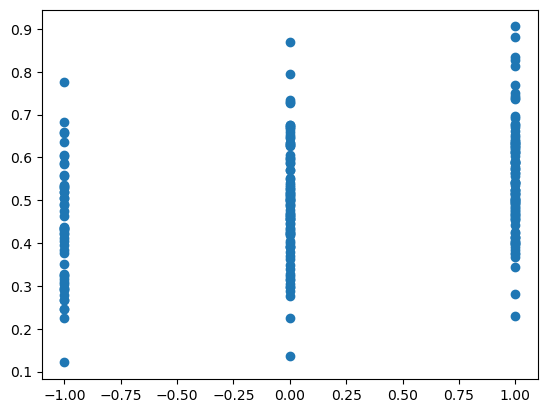

In [81]:
plt.show()

In [39]:
atomic_area_buns_hbonds_and_local_density_selected_df

number_hbonds-buried_unsatisfied_hbond_density-interface_energy-shape_complementarity-interface_area_to_residue_surface_ratio-interface_local_density  \
                                                                                                                                                                                                     sum   
                                                                                                                                                                                        selection_weight   
4mi2_3m6n-DEGEN_1_1-ROT_21_15-tx_78_clean_asu_s...                                           0.905819                                                                                                      
1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_clean_asu_s...                                           0.880172                                                                                                      
1vhc_4knp-DEGEN_1_1-ROT_3_26-tx_309_clean_asu_s...                                           0.870043                                                                                                      
4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_...                                           0.835560                                                                                                      
2gtr_1nq3-DEGEN_1_2-ROT_1_18-tx_132_clean_asu_s...                                           0.826940                                                                                                      
...                                                                                               ...                                                                                                      
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_...                                           0.225000                                                                                                      
3hrx_4jcu-DEGEN_1_1-ROT_9_39-tx_66_clean_asu_sc...                                           0.224353                                                                                                      
3wfv_4lk5-DEGEN_1_1-ROT_9_30-tx_818_clean_asu_s...                                           0.135776                                                                                                      
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_...                                           0.121121                                                                                                      
4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_s...                                           0.000000                                                                                                      

                                                               pose  \
                                                               pose   
                                                   selection_weight   
4mi2_3m6n-DEGEN_1_1-ROT_21_15-tx_78_clean_asu_s...         0.876538   
1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_clean_asu_s...         0.852974   
1vhc_4knp-DEGEN_1_1-ROT_3_26-tx_309_clean_asu_s...         0.883425   
4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_...         0.851303   
2gtr_1nq3-DEGEN_1_2-ROT_1_18-tx_132_clean_asu_s...         0.878908   
...                                                             ...   
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_...         0.349880   
3hrx_4jcu-DEGEN_1_1-ROT_9_39-tx_66_clean_asu_sc...         0.450333   
3wfv_4lk5-DEGEN_1_1-ROT_9_30-tx_818_clean_asu_s...         0.409368   
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_...         0.350124   
4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_s...         0.000000   

                                                                                     \
                                                                                      
                         

In [39]:
fig7, ax7 = plt.subplots(1,1)

In [40]:
ax7.scatter(atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, ('pose','pose','interface_quality_score')], atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, ('interface_energy-interface_area_to_residue_surface_ratio-number_hbonds-interface_local_density-shape_complementarity-buried_unsatisfied_hbond_density', 'sum', 'selection_weight')])
# ax7.scatter(atomic_area_buns_hbonds_and_local_density_selected_df.loc[:, ('pose','pose','interface_quality_score')], atomic_area_buns_hbonds_and_local_density_selected_df.loc[:, ('interface_energy-interface_area_to_residue_surface_ratio-number_hbonds-interface_local_density-shape_complementarity-buried_unsatisfied_hbond_density', 'sum', 'selection_weight')])
# ax6.scatter(atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, ('pose','pose','interface_quality_score')], atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, ('interface_local_density-number_hbonds-interface_area_to_residue_surface_ratio-buried_unsatisfied_hbond_density-interface_energy-shape_complementarity', 'sum', 'selection_weight')])
# ax6.scatter(atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, ('pose','pose','interface_quality_score')], atomic_area_buns_hbonds_and_local_density_selected_df.loc[km_selected_design_indices, ('interface_local_density-number_hbonds-shape_complementarity-buried_unsatisfied_hbond_density-interface_energy-interface_area_to_residue_surface_ratio', 'sum', 'selection_weight')])

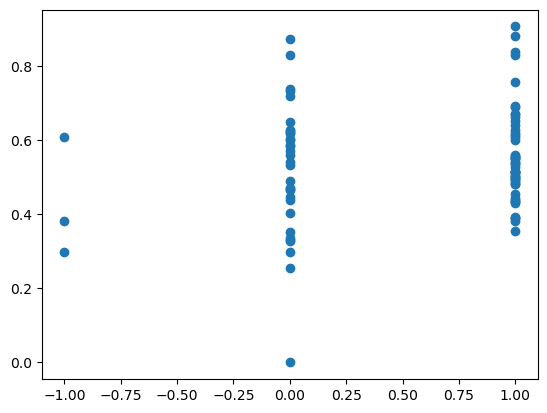

In [41]:
plt.show()